In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score

data = pd.read_csv("game_team_averages_with_winner.csv")
data=data.dropna()

X = data.drop(columns=["winner"])
y = data["winner"]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Step 9: Train and Evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print("Confusion Matrix:")
print(conf_matrix_rf)
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")


Random Forest Metrics:
Confusion Matrix:
[[195  77]
 [ 76 205]]
Accuracy: 0.72
Precision: 0.73
Recall: 0.73
F1 Score: 0.73


<Figure size 1200x600 with 0 Axes>

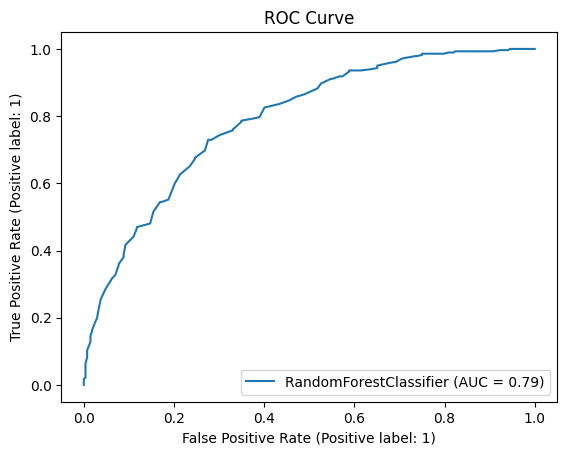

<Figure size 1200x600 with 0 Axes>

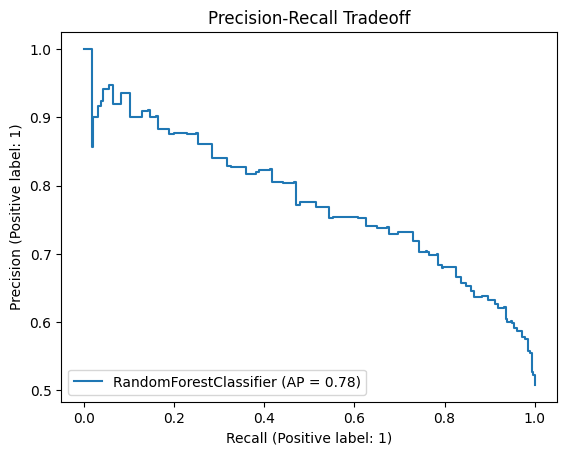

In [7]:
y_prob = rf_model.predict_proba(X_test)[:, 1]  #Probability for the positive class


roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(12, 6))
roc_display = RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

plt.figure(figsize=(12, 6))
pr_display = PrecisionRecallDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Precision-Recall Tradeoff")
plt.show()

In [4]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.66515837, 0.70135747, 0.69683258, 0.6561086 , 0.68707483])

In [8]:
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Mean Cross-Validation Accuracy: 0.68
